In [1]:
#First we will import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Now We will load the train dataset 
train_df=pd.read_csv("train_qnU1GcL.csv",index_col=0)

In [3]:
#Let's check the first 5 records of train dataset which we have loaded in train_df variable
train_df.head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
id,,,,,,,,,,,
110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [4]:
#Now We will load the test dataset
test_df=pd.read_csv("test__Szvtp7B_KytlNBf_48WC0Kd_G79K38T.csv",index_col=0)

In [5]:
#Let's check the first 5 records of test dataset which we have loaded in test_df variable
test_df.head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
id,,,,,,,,,,
649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural
81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban
70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban
53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural
15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural


In [6]:
#Let's check the columns of train and test dataset
print("Columns of Train DataSet : \n")
print(train_df.columns)
print("-------------------------------")
print("Columns of Test DataSet : \n")
print(test_df.columns)

Columns of Train DataSet : 

Index(['perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target'],
      dtype='object')
-------------------------------
Columns of Test DataSet : 

Index(['perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type'],
      dtype='object')


In [7]:
#Check the shape of both variables
print("Number of Rows and Columns in Train DataSet :")
print(train_df.shape)
print("Number of Rows and Columns in Test DataSet :")
print(test_df.shape)

Number of Rows and Columns in Train DataSet :
(79853, 11)
Number of Rows and Columns in Test DataSet :
(34224, 10)


There are 11 columns in our train dataset and 10 columns in test dataset. The Missing column in test dataset is the target variable and by training our model we will predict target variable for test dataset.

In [8]:
#DataTypes of train_df columns
train_df.dtypes

perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

We can infer that all the variables in the dataset except sourcing_channel and residence_area_type are numerical variables. Now Let's look at the distribution of target variable i.e 'target'.

# Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


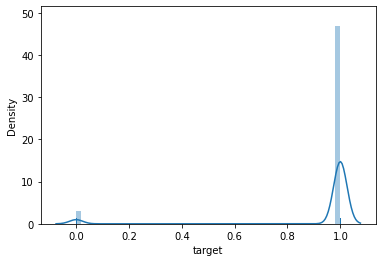

In [9]:
#distribution of target variable
sns.distplot(train_df['target'],rug=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


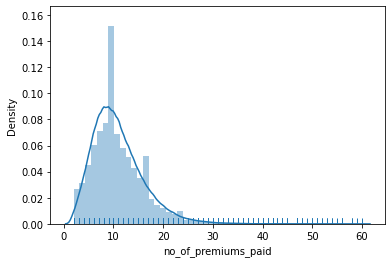

In [10]:
#check the distribution on premium paid by the customer
sns.distplot(train_df['no_of_premiums_paid'],rug=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


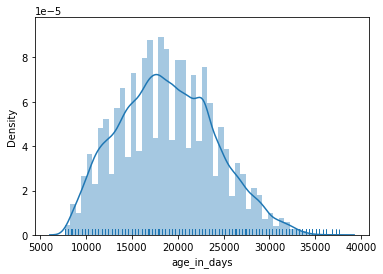

In [11]:
#check the distribution on age in days variable
sns.distplot(train_df['age_in_days'],rug=True)

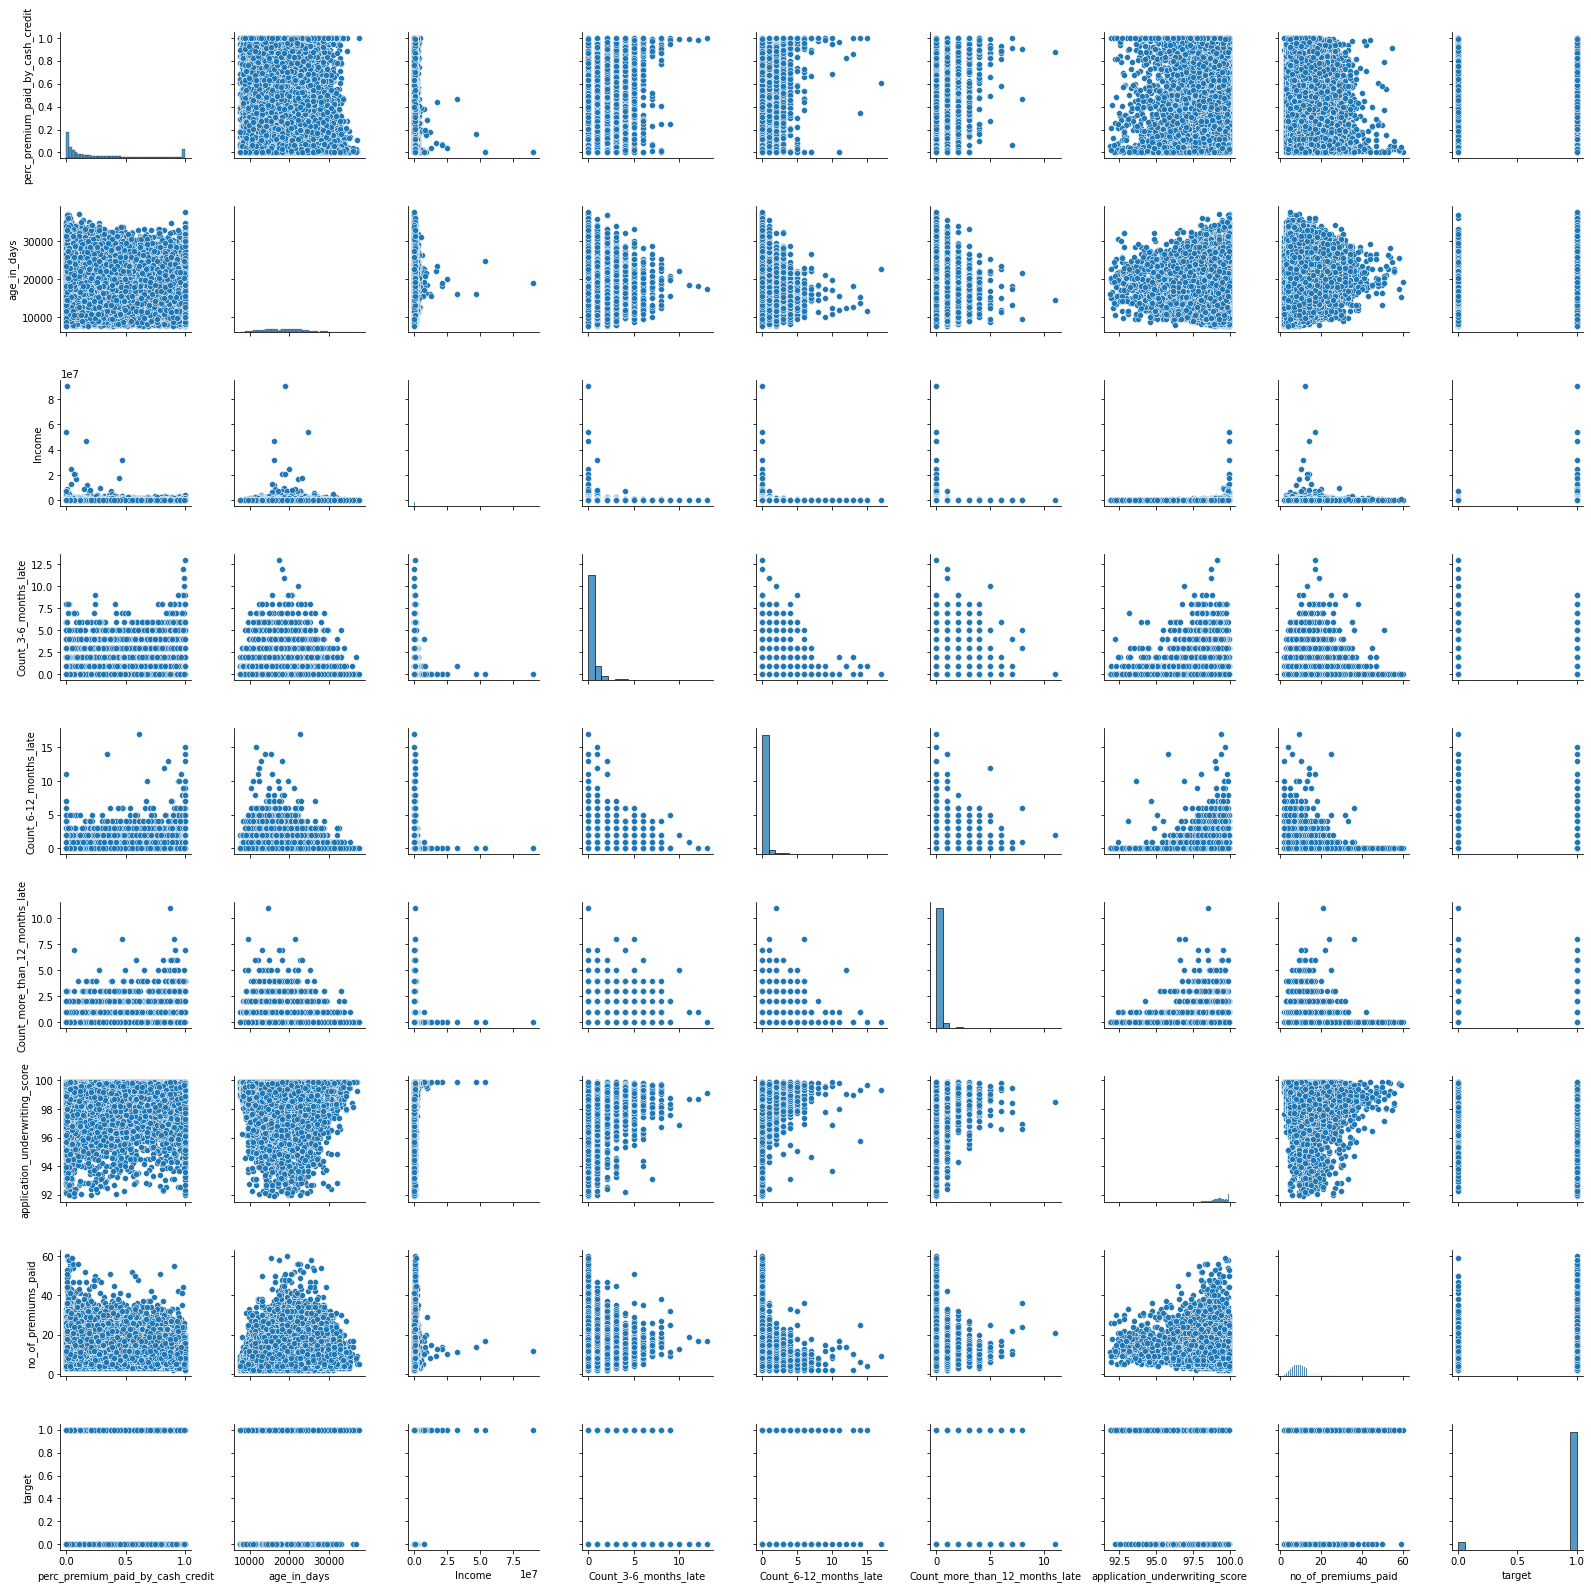

In [12]:
#Let's check the relationships by plotting graphs
sns.pairplot(train_df)

In [13]:
#Now Let's check if our train_df have any missing values
train_df.isnull().sum()

perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

We can see that there are missing values in four columns and it is a best practice to impute missing values rather than dropping them. So we will check if we can impute missing values with mean,median or mode or simply fill missing values by 0.

In [14]:
#We will create a frequency distribution for each missing columns
train_df['Count_3-6_months_late'].value_counts()

0.0     66801
1.0      8826
2.0      2519
3.0       954
4.0       374
5.0       168
6.0        68
7.0        23
8.0        15
9.0         4
11.0        1
12.0        1
13.0        1
10.0        1
Name: Count_3-6_months_late, dtype: int64

In [15]:
train_df['Count_6-12_months_late'].value_counts()

0.0     75831
1.0      2680
2.0       693
3.0       317
4.0       130
5.0        46
6.0        26
7.0        11
8.0         5
10.0        4
9.0         4
14.0        2
11.0        2
13.0        2
17.0        1
12.0        1
15.0        1
Name: Count_6-12_months_late, dtype: int64

In [16]:
train_df['Count_more_than_12_months_late'].value_counts()

0.0     76038
1.0      2996
2.0       498
3.0       151
4.0        48
5.0        13
6.0         6
7.0         3
8.0         2
11.0        1
Name: Count_more_than_12_months_late, dtype: int64

In [17]:
train_df['application_underwriting_score'].value_counts()

99.89    1972
99.88    1343
99.87     856
99.86     693
99.30     642
         ... 
92.36       1
92.58       1
93.22       1
93.78       1
95.32       1
Name: application_underwriting_score, Length: 672, dtype: int64

As we can see that the count variables have more values as 0 and the application underwriting score have more values from 95 to 99. So for count variables we will fill null values as 0 and for application underwriting score we will impute null values with mean of that column.

In [18]:
mean_application=train_df['application_underwriting_score'].mean()

In [19]:
mean_application

99.06729119785102

In [20]:
train_df.isnull().sum()

perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

In [21]:
train_df['Count_3-6_months_late'] = train_df['Count_3-6_months_late'].fillna(0)
train_df['Count_6-12_months_late'] = train_df['Count_6-12_months_late'].fillna(0)
train_df['Count_more_than_12_months_late'] = train_df['Count_more_than_12_months_late'].fillna(0)
train_df['application_underwriting_score'] = train_df['application_underwriting_score'].fillna(mean_application)

In [22]:
train_df.isnull().sum()

perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
target                              0
dtype: int64

In [23]:
#Let's check null values in test_df variable
test_df.isnull().sum()

perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 31
Count_6-12_months_late                31
Count_more_than_12_months_late        31
application_underwriting_score      1323
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
dtype: int64

In [24]:
test_df['Count_3-6_months_late'].value_counts()

0.0     28828
1.0      3734
2.0       994
3.0       348
4.0       160
5.0        69
6.0        32
7.0        15
8.0         6
9.0         5
12.0        1
10.0        1
Name: Count_3-6_months_late, dtype: int64

In [25]:
test_df['Count_6-12_months_late'].value_counts()

0.0     32521
1.0      1116
2.0       312
3.0       119
4.0        56
5.0        28
6.0        18
9.0         8
7.0         7
8.0         5
10.0        3
Name: Count_6-12_months_late, dtype: int64

In [26]:
test_df['Count_more_than_12_months_late'].value_counts()

0.0    32649
1.0     1241
2.0      220
3.0       52
4.0       14
5.0        9
6.0        7
7.0        1
Name: Count_more_than_12_months_late, dtype: int64

In [27]:
test_df['application_underwriting_score'].value_counts()

99.89    863
99.88    597
99.87    381
99.32    296
99.46    286
        ... 
94.45      1
94.20      1
94.12      1
93.88      1
94.87      1
Name: application_underwriting_score, Length: 564, dtype: int64

In [28]:
mean2=test_df['application_underwriting_score'].mean()
mean2

99.06189811859878

In [29]:
#Filling missing values in test_df
test_df['Count_3-6_months_late'] = test_df['Count_3-6_months_late'].fillna(0)
test_df['Count_6-12_months_late'] = test_df['Count_6-12_months_late'].fillna(0)
test_df['Count_more_than_12_months_late'] = test_df['Count_more_than_12_months_late'].fillna(0)
test_df['application_underwriting_score'] = test_df['application_underwriting_score'].fillna(mean2)

In [30]:
test_df.isnull().sum()

perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
dtype: int64

# Bivariate Analysis

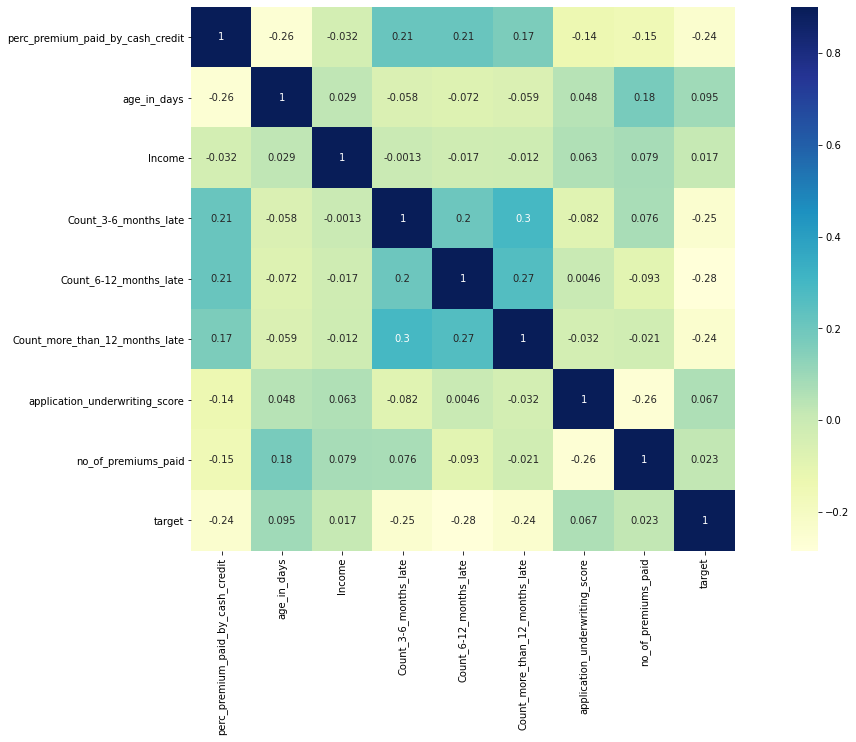

In [31]:
#Now we will look at the correlation between numerical variables
train_corr=train_df[['perc_premium_paid_by_cash_credit','age_in_days','Income','Count_3-6_months_late','Count_6-12_months_late','Count_more_than_12_months_late','application_underwriting_score','no_of_premiums_paid','target']].corr()
fig,ax=plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(train_corr,vmax=.9,square=True,annot=True,cmap='YlGnBu')

As we can see the correlation between the variables is not much high, so there is no problem of multicollinearity.

# Model Building

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
#Now let's initialize the linear regression model
lr = LinearRegression()

The train data will be divided into training and validation.

In [34]:
training_df=train_df[train_df['age_in_days']<=28000]
validation_df=train_df[train_df['age_in_days']>28000]

In [35]:
train_df.shape, test_df.shape, training_df.shape, validation_df.shape

((79853, 11), (34224, 10), (75926, 11), (3927, 11))

In [36]:
train_df = train_df.drop(['sourcing_channel','residence_area_type'],axis=1)
test_df = test_df.drop(['sourcing_channel','residence_area_type'], axis=1)
training_df = training_df.drop(['sourcing_channel','residence_area_type'],axis=1)
validation_df = validation_df.drop(['sourcing_channel','residence_area_type'],axis=1)

In [37]:
x_train_df = train_df.drop('target',1)
y_train_df = train_df['target']
x_val_df = validation_df.drop('target',1)
y_val_df = validation_df['target']

In [38]:
#Now Let's check the shape of x_train_df,y_train_df,x_val_df and y_val_df
x_train_df.shape, y_train_df.shape, x_val_df.shape, y_val_df.shape

((79853, 8), (79853,), (3927, 8), (3927,))

In [39]:
x_train_df = pd.get_dummies(x_train_df)
x_val_df = pd.get_dummies(x_val_df)

In [40]:
#Fitting the model on x_train_df and y_train_df
lr.fit(x_train_df,y_train_df)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
#Now Let's make predictions on validation set
prediction1 = lr.predict(x_val_df)

In [42]:
prediction1.shape, x_train_df.shape, y_train_df.shape, x_val_df.shape, y_val_df.shape

((3927,), (79853, 8), (79853,), (3927, 8), (3927,))

In [43]:
# defining a function which will return the rmsle score
def rmlse(y,y_):
  log1 = np.nan_to_num(np.array([np.log(v+1) for v in y]))
  log2 = np.nan_to_num(np.array([np.log(v+1) for v in y_]))
  calc = (log1 -log2)**2
  return np.sqrt(np.mean(calc))

In [44]:
rmlse(y_val_df,prediction1)

0.09667757053715913

In [45]:
lr.score(x_train_df,y_train_df)

0.15562846194518465

# Decision Tree

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
dt_reg = DecisionTreeRegressor(max_depth=5)

In [48]:
dt_reg.fit(x_train_df,y_train_df)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [49]:
prediction2 = dt_reg.predict(x_val_df)

In [50]:
#Calculationg rmlse of the predicted values
rmlse(y_val_df,prediction2)

0.09532121383387346

In [51]:
test_df = pd.get_dummies(test_df)

In [52]:
test_pred = dt_reg.predict(test_df)

In [53]:
final_pred = test_pred

Finally, we will save these predictions into a csv file. You can then open this csv file and copy paste the predictions on the provided excel file to generate score.

In [54]:
new_submission = pd.DataFrame()

In [55]:
#Creating a target column and saving the predictions in it
new_submission['target'] = final_pred

In [56]:
new_submission.to_csv('new_submission.csv',header=True, index=False)